## Introduction

`Nama: Fadhil Reza Maulana`


## Description

    Dataset yang akan di gunakan dalam pengerjaan Milestone 2 ini adalah dataset mengenai 'Airline Passenger Satisfaction', dimana berisikan data survey dari beberapa pengguna maskapai penerbangan terkait faktor apa saja yang menandakan kepuasan mereka masing-masing.

### Objective

    Tujuan dari pengerjaan Milestone 2 ini adalah untuk membuat suatu model yang mampu memprediksi bagaimana tingkat kepuasan seorang pengguna maskapai (satisfied atau dissatisfied/netral) berdasarkan beberapa data input yang mereka berikan.
    
### Problem Statement

    Dalam pembuatan model akan di lakukan percobaan terhadap beberapa algoritma Supervised Learning Classification seperti Logistic Classification, Decision Tree, Random Forest Classification, dan dari hasil evaluasi terhadap model-model tersebut akan di ambil satu model yang akan menjadi base model yang nantinya akan dilakukan hyperparameter tuning terhadap model tersebut.

## Working Area

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import pickle

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

**Load Data Train dan Test**

1. train = data train
2. test = data test

In [2]:
pd.set_option('display.max_columns', None)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploratory Data Analysis (EDA)

### Pengecekan Duplikasi Data

In [3]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

Tidak ada data yang terduplicate baik untuk data train dan test

### First Look Dataset Train dan Test

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
train.shape,test.shape

((103904, 25), (25976, 25))

Dimensi dari data train terdiri atas 103904 baris dan 25 kolom

Dimensi dari data test terdiri atas 25976 baris dan 25 kolom

**Penjelasan setiap variables dari dataset**
1.	Gender                              : Gender of the passengers (Female, Male)
2.	Customer Type                       : The customer type (Loyal customer, disloyal customer)
3.	Age                                 : The actual age of the passengers
4.	Type of Travel                      : Purpose of the flight of the passengers (Personal Travel, Business Travel)
5.	Class                               : Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6.	Flight distance                     : The flight distance of this journey
7.	Inflight wifi service               : Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8.	Departure/Arrival time convenient   : Satisfaction level of Departure/Arrival time convenient
9.	Ease of Online booking              : Satisfaction level of online booking
10.	Gate location                       : Satisfaction level of Gate location
11.	Food and drink                      : Satisfaction level of Food and drink
12.	Online boarding                     : Satisfaction level of online boarding
13.	Seat comfort                        : Satisfaction level of Seat comfort
14.	Inflight entertainment              : Satisfaction level of inflight entertainment
15.	On-board service                    : Satisfaction level of On-board service
16.	Leg room service                    : Satisfaction level of Leg room service
17.	Baggage handling                    : Satisfaction level of baggage handling
18.	Check-in service                    : Satisfaction level of Check-in service
19.	Inflight service                    : Satisfaction level of inflight service
20.	Cleanliness                         : Satisfaction level of Cleanliness
21.	Departure Delay in Minutes          : Minutes delayed when departure
22.	Arrival Delay in Minutes            : Minutes delayed when Arrival
23.	Satisfaction                        : Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


### Rangkuman Dataset Train dan Test

**Data Train**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

**Data Test**

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [10]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Dari hasil pengecekan rangkuman dataset train dan test didapatkan beberapa informasi sebagai berikut:

1. Distribusi tipe data setiap variables di data train dan test terdiri atas 20 variables numerik dan 5 varibles object
2. Missing value dari kedua data di dapatkan berada pada variable 'Arrival Delay in Minutes' dengan jumlah:
    * Train = 310 Missing Value
    * Test = 83 Missing Value

### Korelasi Antar Variables in General (Data Train)

**Mengubah tipe data variable target 'Satisfaction' ke dalam bentuk numerik, untuk melihat korelasi dengan fitur-fitur yang ada**

In [11]:
train.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [12]:
corr_check = train.copy()
corr_check['satisfaction'] = pd.factorize(corr_check['satisfaction'])[0]
corr_check
corr_check.satisfaction.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

Keterangan:

* 0 = neutral or dissatisfied
* 1 = satisfied

**Pengecekan korelasi antara target dengan fitur dengan heatmap**

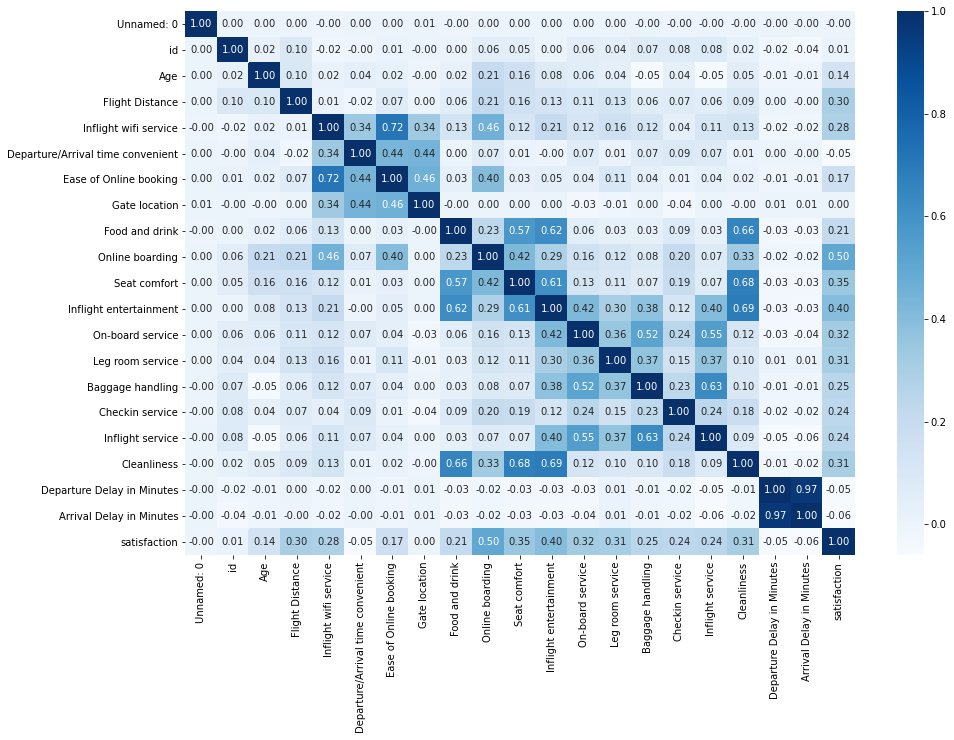

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_check.corr(), annot = True, fmt = '.2f', cmap = 'Blues')
plt.show()

Dari hasil korelasi antara fitur dengan target didapatkan rangkuman sebagai berikut:

1. Beberapa fitur yang memiliki korelasi yang cukup besar dengan target adalah fitur *Online boarding (0.5), Inflight Entertainment (0.4) dan Seat comfort (0.35)*.

2. Beberapa fitur yang memiliki korelasi yang sangat kecil dengan target adalah fitur *Gate Location (0.0), Departure Delay in Minutes (-0.05) dan Arrival Delay in Minutes (-0.06)*.

3. Untuk variable seperti 'Unnamed' dan 'id' otomatis akan di drop karena itu hanya penanda nomor penumpang saja, tidak ada arti lain yang berhubungan dengan target.

### Pemeriksaan Korelasi Beberapa Fitur dengan Target ('Satisfaction')

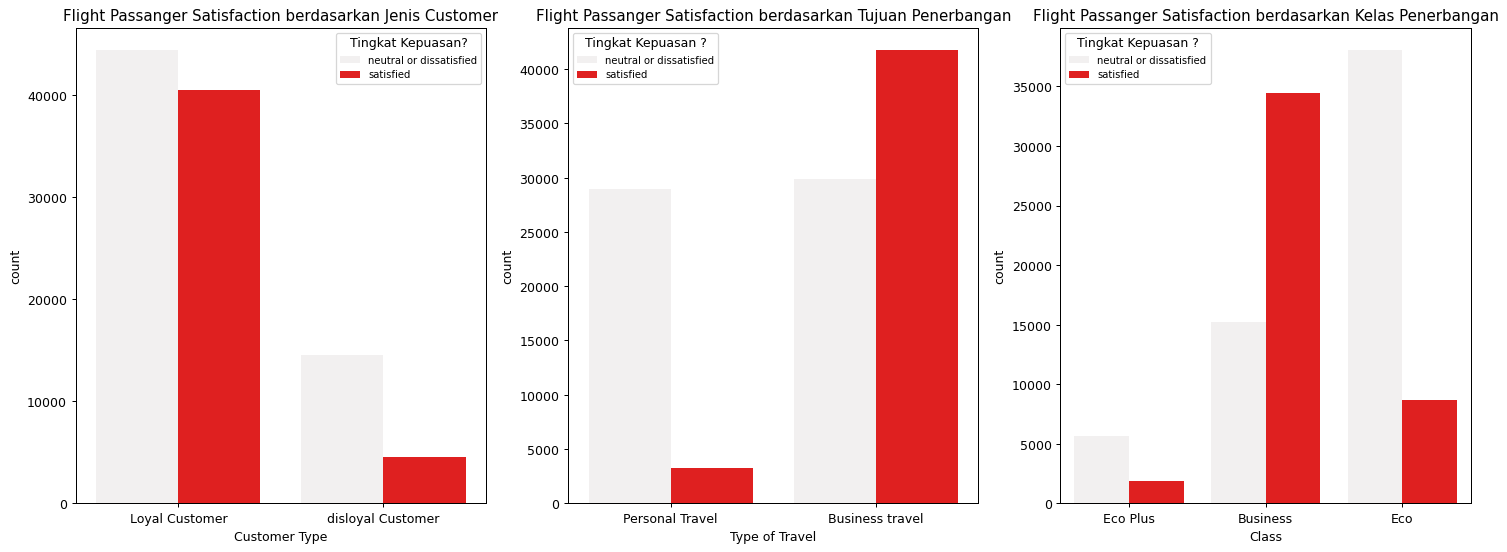

In [14]:
fig, ax = plt.subplots(1, 3, figsize =(20,7), dpi=90)
sns.countplot(x = 'Customer Type', hue= 'satisfaction', data = train, color = 'red', ax=ax[0])
sns.countplot(x = 'Type of Travel',hue= 'satisfaction', data = train, color = 'red', ax=ax[1])
sns.countplot(x = 'Class',hue= 'satisfaction', data = train, color = 'red', ax=ax[2])

ax[0].title.set_text('Flight Passanger Satisfaction berdasarkan Jenis Customer')
ax[1].title.set_text('Flight Passanger Satisfaction berdasarkan Tujuan Penerbangan')
ax[2].title.set_text('Flight Passanger Satisfaction berdasarkan Kelas Penerbangan')

ax[0].legend(title = 'Tingkat Kepuasan?', fontsize=8)
ax[1].legend(title = 'Tingkat Kepuasan ?', fontsize=8)
ax[2].legend(title = 'Tingkat Kepuasan ?', fontsize=8)

plt.show()



Grafik di atas menunjukan bagaimana kepuasan penumpang pesawat berdasarkan jenis pelanggan, tujuan penerbangan dan kelas penerbangan yang di ambil oleh penumpang. Terlihat bahwa penumpang-penumpang yang loyal, tujuan penerbangannya yaitu untuk melakukan business trip dan juga penumpang yang menggunakan Business Class lebih banyak yang merasa puas dengan layanan yang di berikan oleh maskapai selama penerbangan.

### Hubungan Jarak Penerbangan dengan Jenis Perjalanan

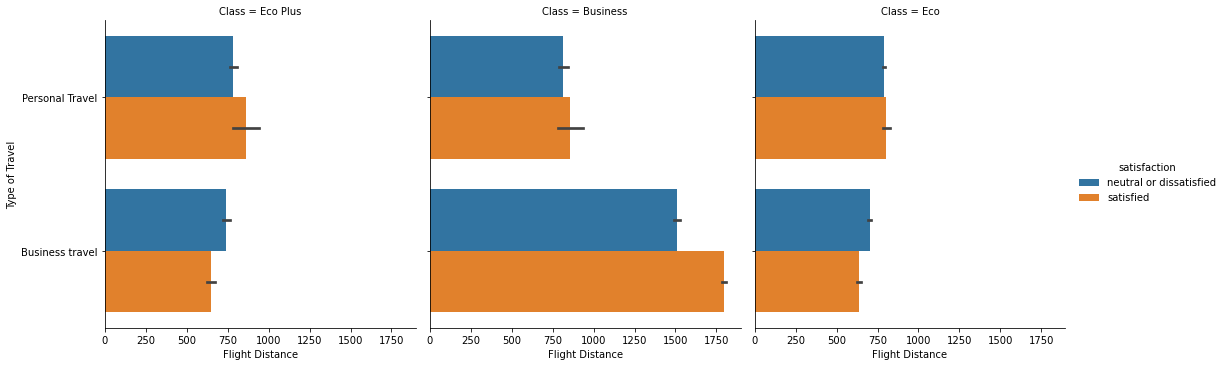

In [15]:
sns.catplot(kind='bar', col = 'Class', x='Flight Distance', y='Type of Travel', hue='satisfaction', data = train)
#black line adalah error dari bar 

Grafik di atas menunjukan bagaimana hubungan jarak suatu penerbangan dengan jenis penerbangan yang di kelompokkan berdasarkan pemilihan kelas penerbangan (Eco, Eco Plus dan Business) dengan melihat bagaimana satisfaction mereka selama penerbangan. Didapatkan beberapa informasi sebagai berikut:

1. Untuk konsumen dengan jenis penerbangan 'Personal Travel', baik di kelas Eco Plus, Eco, maupun Business lebih banyak merasa puas dengan layanan yang airline berikan
2. Untuk konsumen dengan jenis penerbangan 'Business Travel', mereka lebih puas melakukan penerbangan dengan kelas Business untuk jarak yang jauh, hal ini didasari dengan alasan mungkin karena jaraknya jauh, mereka melakukan penerbangan untuk urusan bisnis maka dengan memilih kelas Business, mereka akan lebih dimanjakan dengan fasilitas dan privacy yang lebih baik, sehingga ketika sampai di tempat tujuan tidak terlalu merasa kelelahan akibat penerbangan dan bisa lebih produktif untuk melakukan urusan bisnis kedepannya.

### Hubungan Satisfaction dengan Seat comfort, Inflight entertainment, Online boarding

Pada grafik ini akan menampilkan bagaimana hubungan target dengan fitur-fitur yang memiliki korelasinya paling tinggi

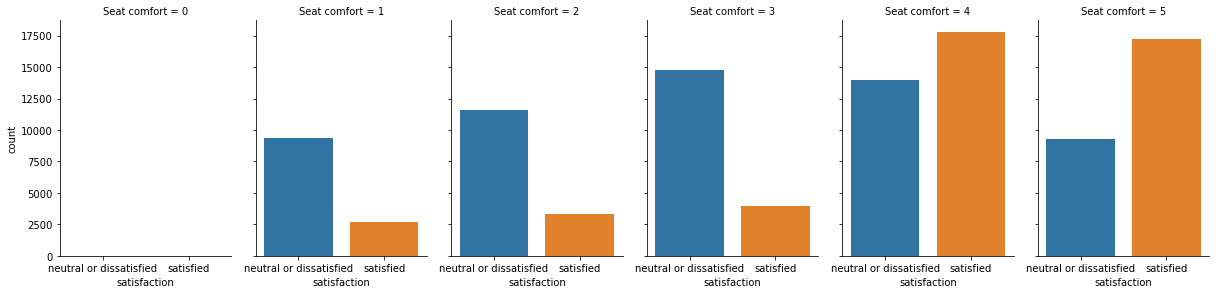

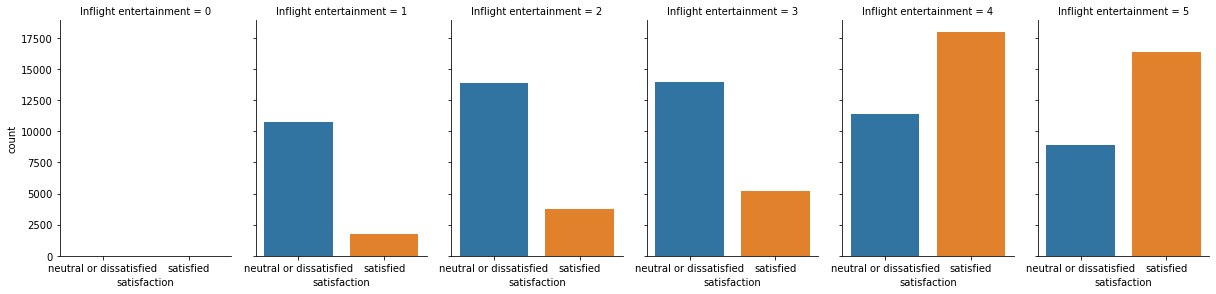

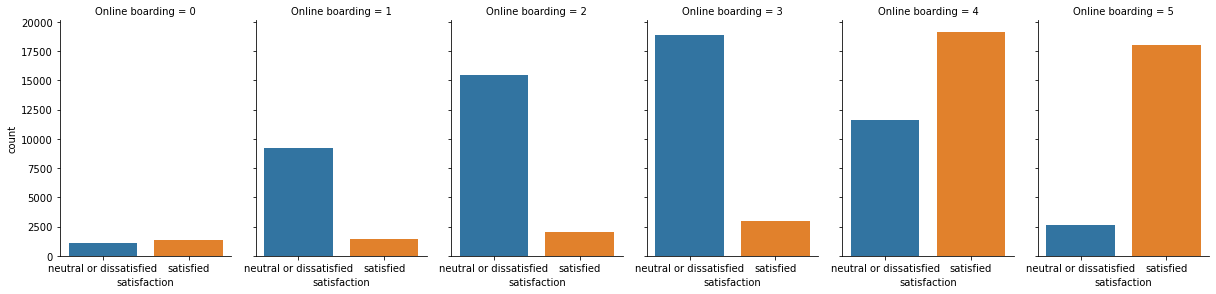

In [16]:
sns.catplot(kind = 'count', x='satisfaction', col='Seat comfort', data=train, height = 4, aspect=0.7)
sns.catplot(kind = 'count', x='satisfaction', col='Inflight entertainment', data=train, height = 4, aspect=0.7)
sns.catplot(kind = 'count', x='satisfaction', col='Online boarding', data=train, height = 4, aspect=0.7)

Dari grafik plot di atas dapat di simpulkan bagaimana hubungan ke tiga fitur tersebut dengan tingkat satisfaction konsumen selama penerbangan:
1. Terkait seat comfort, semakin nyaman tempat duduk selama penerbangan maka konsumen sudah merasakan bahwa airline ini memiliki tingkat kenyamanan penerbangan yang bagus.
2. Terkait inflight entertainment juga sama, mungkin semakin bervariasi fitur-fitur seperti film, musik atau mungkin ada fitur seperti POV dari berbagai sisi untuk melihat bagaimana keadaan di luar pesawat dapat meningkatkan kenyamanan mereka
3. Terakhir terkait Online boarding, ini untuk keadaan sebelum penerbangan. Jadi mungkin apabila maskapai sudah semakin digital seperti dengan adanya fitur online boarding dimana konsumen hanya perlu melakukan check in melalui aplikasi ataupun website tanpa perlu melakukan check in secara tradisional di terminal bandara juga dapat meningkatkan tingkat kenyamanan mereka. 

## Preprocessing

### Drop Fitur 'Unamed: 0' dan 'id' pada data train dan test

In [17]:
train.drop(['Unnamed: 0','id'], axis = 1, inplace = True)
test.drop(['Unnamed: 0','id'], axis = 1, inplace = True)

Seperti yang sudah di jelaskan pada bagian EDA bahwa kedua varibles ini tidak memiliki korelasi dengan target, melainkan hanya sebagai penanda no penumpang saja

### Spliting Dataset

**Memisahkan Variable Fitur dan Target dari data train dan test**

In [18]:
X_train = train.drop(['satisfaction'], axis = 1)
X_test = test.drop(['satisfaction'], axis = 1)
y_train = train['satisfaction']
y_test = test['satisfaction']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103904, 22), (25976, 22), (103904,), (25976,))

Keterangan:

1. X_train = variable fitur data train
2. X_test = variable fitu data test
3. y_train = variable target data train
4. y_test = variable target data test

### Handling Missing Value

**Cek distribusi data pada fitur dengan tipe data Nominal**

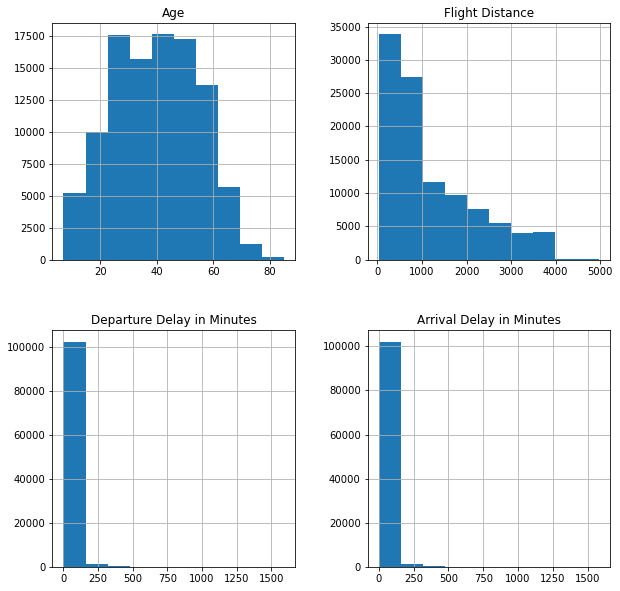

In [19]:
X_train.hist(column = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'], figsize = (10,10))
plt.show()

Dari grafik plot di atas, bisa di ketahui bahwa pendistribusian data dari fitur-fitur ini tidak normal. Maka akan di lakukan handle untuk missing value dengan melakukan imputasi berdasarkan median dari varible yang memiliki missing value

**Imputasi Median terhadap fitur data train dan test**

In [20]:
X_train['Arrival Delay in Minutes'].fillna(X_train['Arrival Delay in Minutes'].median(), inplace = True)
X_test['Arrival Delay in Minutes'].fillna(X_train['Arrival Delay in Minutes'].median(), inplace = True)

In [21]:
X_train.isnull().sum().sum(),X_test.isnull().sum().sum()

(0, 0)

Keterangan:

1. Mengisi missing value pada data train dan test dengan nilai median dari data train
2. Data train dan test sudah bersih dari missing value dengan dilakukan pengecekan melalui 'isnull().sum().sum()'

### Handling Outliers

<AxesSubplot:>

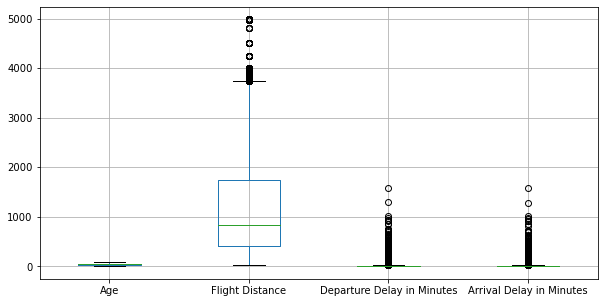

In [22]:
plt.figure(figsize=(10,5))
X_train.boxplot(column = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'])

Dari grafik histogram dan boxplot terlihat data-data fitur cenderung tidak terdistribusi secara normal dan terdapat outliers dari fitur-fitur nominal seperti, 'Fligh Distance', 'Departure Delay in Minutes' dan 'Arrival Delay in Minutes'

**Handling Outliers dengan Trimming metode IQR terhadap fitur data train**

In [23]:
capping = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=1.5,
                          variables=['Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'])
capping.fit(X_train)
X_train_outliers = capping.transform(X_train)

In [24]:
X_train.shape,X_train_outliers.shape

((103904, 22), (103904, 22))

<AxesSubplot:>

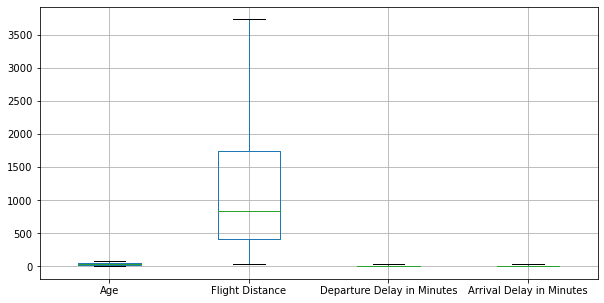

In [25]:
plt.figure(figsize=(10,5))
X_train_outliers.boxplot(column = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'])

### Encoding

In [26]:
X_train_outliers.columns = X_train_outliers.columns.str.replace(' ','_')
X_test.columns = X_test.columns.str.replace(' ','_') 

In [27]:
ce_ord = ce.OrdinalEncoder(cols = ['Gender','Customer_Type','Type_of_Travel','Class'])
X_train_encode=ce_ord.fit_transform(X_train_outliers)
X_test_encode=ce_ord.transform(X_test)

### Ubah Semua Data Type Menjadi int32

In [28]:
X_train_encode.dtypes

Gender                                 int32
Customer_Type                          int32
Age                                    int64
Type_of_Travel                         int32
Class                                  int32
Flight_Distance                      float64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes           float64
Arrival_Delay_in_Minutes             float64
dtype: obj

In [29]:
d = dict.fromkeys(X_train_encode.select_dtypes([np.int64,np.float64]).columns, np.int32)
X_train_encode = X_train_encode.astype(d)
X_train_encode.dtypes

Gender                               int32
Customer_Type                        int32
Age                                  int32
Type_of_Travel                       int32
Class                                int32
Flight_Distance                      int32
Inflight_wifi_service                int32
Departure/Arrival_time_convenient    int32
Ease_of_Online_booking               int32
Gate_location                        int32
Food_and_drink                       int32
Online_boarding                      int32
Seat_comfort                         int32
Inflight_entertainment               int32
On-board_service                     int32
Leg_room_service                     int32
Baggage_handling                     int32
Checkin_service                      int32
Inflight_service                     int32
Cleanliness                          int32
Departure_Delay_in_Minutes           int32
Arrival_Delay_in_Minutes             int32
dtype: object

In [30]:
X_test_encode.dtypes

Gender                                 int32
Customer_Type                          int32
Age                                    int64
Type_of_Travel                         int32
Class                                  int32
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
dtype: obj

In [31]:
c = dict.fromkeys(X_test_encode.select_dtypes([np.int64,np.float64]).columns, np.int32)
X_test_encode = X_test_encode.astype(c)
X_test_encode.dtypes

Gender                               int32
Customer_Type                        int32
Age                                  int32
Type_of_Travel                       int32
Class                                int32
Flight_Distance                      int32
Inflight_wifi_service                int32
Departure/Arrival_time_convenient    int32
Ease_of_Online_booking               int32
Gate_location                        int32
Food_and_drink                       int32
Online_boarding                      int32
Seat_comfort                         int32
Inflight_entertainment               int32
On-board_service                     int32
Leg_room_service                     int32
Baggage_handling                     int32
Checkin_service                      int32
Inflight_service                     int32
Cleanliness                          int32
Departure_Delay_in_Minutes           int32
Arrival_Delay_in_Minutes             int32
dtype: object

### Feature Selection

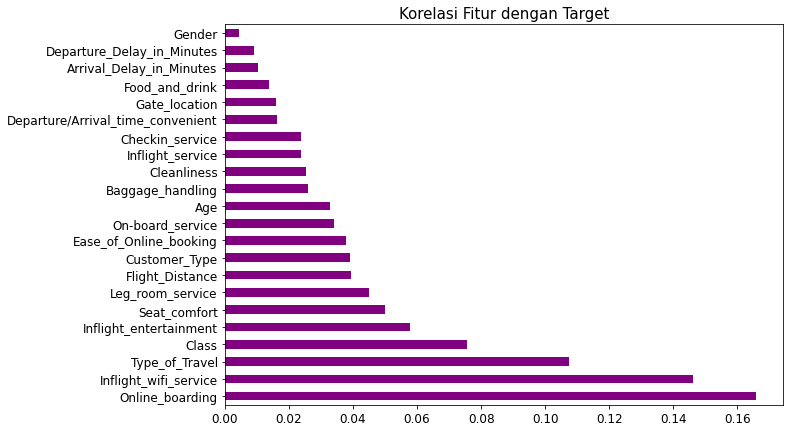

Online_boarding                      0.165813
Inflight_wifi_service                0.146034
Type_of_Travel                       0.107373
Class                                0.075591
Inflight_entertainment               0.057970
Seat_comfort                         0.050104
Leg_room_service                     0.045035
Flight_Distance                      0.039280
Customer_Type                        0.038997
Ease_of_Online_booking               0.037998
On-board_service                     0.033956
Age                                  0.032704
Baggage_handling                     0.026142
Cleanliness                          0.025225
Inflight_service                     0.023729
Checkin_service                      0.023724
Departure/Arrival_time_convenient    0.016247
Gate_location                        0.016156
Food_and_drink                       0.013863
Arrival_Delay_in_Minutes             0.010469
Departure_Delay_in_Minutes           0.009107
Gender                            

In [32]:
select_forest = RandomForestClassifier()
select_forest.fit(X_train_encode,y_train)
feature_score = pd.Series(select_forest.feature_importances_, index=X_train_encode.columns).sort_values(ascending=False)

feature_score.plot(kind = 'barh', color = 'purple', figsize = (10,7), fontsize = 12)
plt.title(label = 'Korelasi Fitur dengan Target', fontsize = 15)
plt.show()
print(feature_score)

In [33]:
X_train_encode.drop(['Gender','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Food_and_drink','Gate_location','Departure/Arrival_time_convenient','Checkin_service','Baggage_handling'], axis = 1, inplace = True)
X_test_encode.drop(['Gender','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Food_and_drink','Gate_location','Departure/Arrival_time_convenient','Checkin_service','Baggage_handling'], axis = 1, inplace = True)

In [34]:
X_train_encode.shape,X_test_encode.shape

((103904, 14), (25976, 14))

Keterangan:

1. Pengecekan korelasi target dengan fitur menggunakan Random Forest Classifier
2. Dari grafik dan tabel korelasi, saya mengambil keputusan untuk melakukan drop fitur yang nilai korelasinya berada di bawah 0.025. Keputusan ini di buat juga dengan melihat korelasi fitur dengan target dari pengecekan dengan heatmap pada tahap EDA.
3. Fitur-fitur yang di drop adalah *'Gender','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes','Food_and_drink','Gate_location','Departure/Arrival_time_convenient', 'Checkin_service' dan 'Baggage_handling'*

## Pembuatan Pipeline Untuk Tahap Scaling dan Modeling (Calon Base Model)

### Pipeline untuk Model Logistic Regression (Base)

In [35]:
estimators_logreg = [('scaling', MinMaxScaler()),('logreg', LogisticRegression())]
pipe_logreg = Pipeline(estimators_logreg)

### Pipeline untuk Model Decision Tree (Base)

In [36]:
estimators_tree = [('scaling', StandardScaler()),('tree', DecisionTreeClassifier())]
pipe_tree = Pipeline(estimators_tree)

### Pipeline untuk Model Random Forest Classifier (Base)

In [37]:
estimators_forest = [('scaling', StandardScaler()),('forest', RandomForestClassifier())]
pipe_forest = Pipeline(estimators_forest)

### Pipeline untuk Model Naive Bayes (Base)

In [38]:
estimators_nb = [('scaling', StandardScaler()),('nb', GaussianNB())]
pipe_nb = Pipeline(estimators_nb)

### Pipeline untuk Model Gradient Boosting Classifier (Base)

In [39]:
estimator_gboost = [('scaling',MinMaxScaler()),('gboost',GradientBoostingClassifier())]
pipe_gboost = Pipeline(estimator_gboost)

## Model - Logistic Regression

In [40]:
pipe_logreg.fit(X_train_encode,y_train)
y_pred_logreg = pipe_logreg.predict(X_test_encode)

## Model - Decision Tree Classifier

In [41]:
pipe_tree.fit(X_train_encode,y_train)
y_pred_tree = pipe_tree.predict(X_test_encode)

## Model - Random Forest Classifier

In [42]:
pipe_forest.fit(X_train_encode,y_train)
y_pred_forest = pipe_forest.predict(X_test_encode)

## Model - Naive Bayes

In [43]:
pipe_nb.fit(X_train_encode,y_train)
y_pred_nb = pipe_nb.predict(X_test_encode)

## Model - Gradient Boosting Classifier

In [44]:
pipe_gboost.fit(X_train_encode,y_train)
y_pred_gboost = pipe_gboost.predict(X_test_encode)

## Evaluasi dan Pemilihan Calon Base Model

### Classification Report Setiap Calon Base Model

**Classification Report Model Logistic Regression**

In [45]:
print(classification_report(y_pred_logreg,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.87      0.88     15032
              satisfied       0.83      0.86      0.84     10944

               accuracy                           0.86     25976
              macro avg       0.86      0.86      0.86     25976
           weighted avg       0.87      0.86      0.86     25976



**Classification Report Model Decision Tree Classifier**

In [46]:
print(classification_report(y_pred_tree,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.94      0.94     14519
              satisfied       0.93      0.93      0.93     11457

               accuracy                           0.94     25976
              macro avg       0.94      0.94      0.94     25976
           weighted avg       0.94      0.94      0.94     25976



**Classification Report Model Random Forest Classifier**

In [47]:
print(classification_report(y_pred_forest,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.95      0.96     14929
              satisfied       0.93      0.96      0.95     11047

               accuracy                           0.95     25976
              macro avg       0.95      0.96      0.95     25976
           weighted avg       0.96      0.95      0.95     25976



**Classification Report Model Naive Bayes**

In [48]:
print(classification_report(y_pred_nb,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.87      0.88     15174
              satisfied       0.82      0.87      0.84     10802

               accuracy                           0.87     25976
              macro avg       0.86      0.87      0.86     25976
           weighted avg       0.87      0.87      0.87     25976



**Classification Report Model Gradient Boosting Classifier**

In [49]:
print(classification_report(y_pred_gboost,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.94      0.95     14839
              satisfied       0.92      0.94      0.93     11137

               accuracy                           0.94     25976
              macro avg       0.94      0.94      0.94     25976
           weighted avg       0.94      0.94      0.94     25976



### Evaluasi Fit Setiap Model

**Fitting Model Logistic Regression**

In [50]:
print('Score Data Train: {:.3f}'.format(pipe_logreg.score(X_train_encode, y_train)))
print('Score Data Test: {:.3f}'.format(pipe_logreg.score(X_test_encode, y_test)))

Score Data Train: 0.867
Score Data Test: 0.864


**Fitting Model Decision Tree Classifier**

In [51]:
print('Score Data Train: {:.3f}'.format(pipe_tree.score(X_train_encode, y_train)))
print('Score Data Test: {:.3f}'.format(pipe_tree.score(X_test_encode, y_test)))

Score Data Train: 1.000
Score Data Test: 0.936


**Fitting Model Random Forest Classifier**

In [52]:
print('Score Data Train: {:.3f}'.format(pipe_forest.score(X_train_encode, y_train)))
print('Score Data Test: {:.3f}'.format(pipe_forest.score(X_test_encode, y_test)))

Score Data Train: 1.000
Score Data Test: 0.955


**Fitting Model Naive Bayes**

In [53]:
print('Score Data Train: {:.3f}'.format(pipe_nb.score(X_train_encode, y_train)))
print('Score Data Test: {:.3f}'.format(pipe_nb.score(X_test_encode, y_test)))

Score Data Train: 0.870
Score Data Test: 0.866


**Fitting Model Gradient Boosting Classifier**

In [54]:
print('Score Data Train: {:.3f}'.format(pipe_gboost.score(X_train_encode, y_train)))
print('Score Data Test: {:.3f}'.format(pipe_gboost.score(X_test_encode, y_test)))

Score Data Train: 0.938
Score Data Test: 0.939


Dari hasil classification report calon base model, akan saya ambil model dengan nilai recall paling besar dari prediksi satisfied dan juga melihat apakah model tersebut overfitting atau tidak

Alasan ini saya buat karena saya ingin model dapat memprediksi value 'Satisfied' (Pelanggan Puas) dengan lebih baik, oleh karena itu model harus bisa menurunkan nilai False Negative, ditandai dengan score recall yang semakin tinggi

`False Negative (menurun) = Recall (naik)`

Kesimpulan dari evaluasi model:

1. Jika melihat dari f1-score, model Decision Tree Classifier dan Random Forest Classifier memiliki score yang sangat tinggi yaitu dengan rata-rata score di atas 0.9. Tetapi jika di lihat dari fitting modelnya, kedua model tersebut mengalami overfitting yang sangat besar perbedaanya antara data train dan test. Sehingga kedua model tersebut saya eleminasi dari calon base model.

2. Untuk model Logistic Regression, Naive Bayes dan Gradient Boosting Classifier mari kita lihat, perbandingan nilai dari kedua model tersebut:
    * Logistic Regression:
        * Recall score value 'Satisfied' : 0.86
        * Score Data Train: 0.867
        * Score Data Test: 0.864
    
    * Naive Bayes:
        * Recall score value 'Satisfied' : 0.87
        * Score Data Train: 0.870
        * Score Data Test: 0.866

    * Gradient Boosting Classifier:
        * Recall score value 'Satisfied' : 0.94
        * Score Data Train: 0.938
        * Score Data Test: 0.939

    Jika dilihat dari pemetaan score dari kedua model tersebut, keduanya masih mungkin untuk menjadi base model dari dataset ini. Dapat dilihat juga dari fit keduanya, walaupun sama-sama mengalami overfitting, namun perbedaan antara train dan test tidak terlalu jauh, hal ini dapat di atas dengan pengerjaan step selanjutnya yaitu dengan melakukan hyperparameter tuning.

    Tapi jika kita melihat model Gradient Boosting Classifier. Dengan score recallnya yang sangat besar (0.94) namun modelnya tidak mengalami overfitting sama sekali, bahkan bisa di bilang model ini sangat fit dengan dataset yang ada bisa dilihat dari score antara data train dan test yang hanya memiliki selesih sebesar 0.001 saja.

Dari kesimpulan di atas, model yang akan saya jadikan sebagai base model untuk memprediksi satisfaction dari dataset ini adalah model *'Gradient Boosting Classifier'*

## Model Improvement - Gradient Boosting Classifier (as a Base Model)

Hyperparameter tuning yang saya gunakan adalah dengan mengkombinasikan Grid Search dengan Cross Validation.
Parameter dan value acuannya adalah:

    * n_estimators : 100,150,200
    * min_samples_split : 2,4,10
    
Parameter-parameter yang saya gunakan dalam optimisasi Model Gradient Boosting Classifier ini karena keterbatasan waktu dan runing modelnya membutuhkan waktu yang sangat lama.

In [55]:
best_score = 0
for n_estimators in [100,150,200]:
      for min_samples_split in [2,4,10]:
        gboost_opt = GradientBoostingClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split)                
        scores = cross_val_score(gboost_opt, X_train_encode,y_train, cv = 5) # Membagi data train menjadi 5 fold
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameter = {'n_estimators':n_estimators, 'min_samples_split':min_samples_split}

print('Best Score: {: .2f}'.format(best_score))
print('Best Parameter: {}'.format(best_parameter))

Best Score:  0.95
Best Parameter: {'n_estimators': 200, 'min_samples_split': 4}


Didapatkan best parameter dengan n_estimators adalah 200 dan min_samples_splitnya adalah 4

In [56]:
gboost_opt = GradientBoostingClassifier(**best_parameter)
gboost_opt

GradientBoostingClassifier(min_samples_split=4, n_estimators=200)

In [57]:
estimator_gboost_opt = [('scaling', MinMaxScaler()),('logreg', gboost_opt)]
pipe_gboost_opt = Pipeline(estimator_gboost_opt)

In [58]:
pipe_gboost_opt.fit(X_train_encode,y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('logreg',
                 GradientBoostingClassifier(min_samples_split=4,
                                            n_estimators=200))])

In [59]:
y_pred_gboost_opt = pipe_gboost_opt.predict(X_test_encode)

In [60]:
print(classification_report(y_pred_gboost_opt,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.94      0.95     14943
              satisfied       0.92      0.95      0.94     11033

               accuracy                           0.95     25976
              macro avg       0.94      0.95      0.95     25976
           weighted avg       0.95      0.95      0.95     25976



In [61]:
print('Score Data Train: {:.3f}'.format(pipe_gboost_opt.score(X_train_encode, y_train)))
print('Score Data Test: {:.3f}'.format(pipe_gboost_opt.score(X_test_encode, y_test)))

Score Data Train: 0.947
Score Data Test: 0.947


Keterangan:
Dari proses pendifinisian model dengan best parameter hingga evaluasi model melalui score recall dari value 'satisfied' dan score data train dan test. Model optimisasi ini mengalami peningkatan:
1. Recall (0.94 naik menjadi 0.95)
2. Score data train dan test hasilnya sama (0.947), menandakan bahwa model ini benar-benar fit untuk memprediksi satisfaction pelanggan suatu airline dari dataset ini.

## Export Model Gradient Boosting Classifier Hasil Hyperparameter Tuning

**Model di simpan dalam file bentuk pickle dengan nama 'model_gboost.pkl'**

In [62]:
with open ('model_gboost.pkl', 'wb') as pipe_model:
    pickle.dump (pipe_gboost_opt, pipe_model)

## Model Inference

Extract nama kolom dari data X_test_encode dan menyimpannya dalam variables 'columns_name' dan menjadikannya dataframe kosong pada variable dummy

In [63]:
X_test_encode.columns

Index(['Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Ease_of_Online_booking', 'Online_boarding',
       'Seat_comfort', 'Inflight_entertainment', 'On-board_service',
       'Leg_room_service', 'Inflight_service', 'Cleanliness'],
      dtype='object')

In [64]:
columns_name =['Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Ease_of_Online_booking', 'Online_boarding',
       'Seat_comfort', 'Inflight_entertainment', 'On-board_service',
       'Leg_room_service', 'Inflight_service', 'Cleanliness']
dummy = pd.DataFrame(columns = columns_name)

Menambahkan baris pada dataframe dengan data-data yang sudah di sesuaikan dengan nama kolom

In [65]:
dummy.loc[0]= [1,30,1,1,100,4,4,4,3,3,2,1,4,4]

In [68]:
dummy

,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Ease_of_Online_booking,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Inflight_service,Cleanliness
0,1,30,1,1,100,4,4,4,3,3,2,1,4,4


Memprediksi outputan dataset

In [66]:
dummy_pred = pipe_gboost_opt.predict(dummy)
print(dummy_pred)

['neutral or dissatisfied']


**Ternyata data baris 0 terprediksi bahwa penumpang suatu airline itu netral atau tidak puas dengan layanan maskapai penerbangan**

## Analysis

### Model Analysis

Algoritma supervised learning yang di gunakan dalam melakukan prediksi tingkat satisfaction konsumen airline adalah:

    * Logistic Regression
    * Decision Tree Classifier
    * Random Forest Classifier
    * Naive Bayes
    * Gradient Boosting Classifier
    * Linear Discriminant Analysis

Dari semua algoritma diatas. Algoritma terbaik yang digunakan untuk membuat model prediksi dari data ini adalah **Gradient Boosting Classifier**, dengan score recall untuk value 'satisfied' yang sangat tinggi yaitu di angka 0.94, dan fitting modelnya sudah pas, tidak overfitting maupun underfitting.

Score data train dan test:

    * Score Data Train: 0.938
    * Score Data Test: 0.939


Kemudian setelah dilakukan hyperparameter tuning pada model **Gradient Boosting Classifier**. Dalam penentuan hyperparameter tuning terbaik di device ini memerlukan waktu kurang lebih sekitar 13 menit, model ini termasuk cukup lama dalam menentukan best parameter dengan jumlah parameter yang di tentukan tidak terlalu banyak.

Hasil dari tuning atau optimisasi ini score recall yang sama masih di 0.94, tapi ada peningkatan score di data train dan test

    * Score Data Train: 0.947
    * Score Data Test: 0.947

Jadi kesimpulan dari model **Gradient Boosting Classifier** untuk dataset ini sangat cocok, model dapat membedakan apakah pelanggan nyaman atau tidak dengan sangat akurat. Namun ada hal yang perlu di garis bawahi. Jika kita menambahkan lebih banyak lagi parameter-parameter yang akan di uji selama proses optimisasi, membutuhkan waktu yang sangat lama dan hal ini dapat menjadi pertimbangan dalam pemilihan model dengan melihat situasi dan kondisi dari project yang akan kita gunakan kedepannya.

*For your information: saya sudah mencoba melakukan hyper parameter tuning dengan menambahkan beberapa parameter lain dan ternyata setelah 4 jam berlalu, model belum selesai juga menentukan best parameternya. Jika dilihat dari kondisi pengerjaan Milestone 2 yang waktunya tidak banyak, hal ini akan sangat memakan waktu pengerjaan steps lain. Contoh seperti ini bisa menjadi pertimbangan dalam menggunakan model Gradient Boosting Classifier kedepan.*


### Overall Analysis

Kesimpulan yang bisa saya dapatkan dari pengolahan dataset Airline Passenger Satisfaction ini adalah:

1. Model 'Gradient Boosting Classifier' menjadi model paling tepat untuk memprediksi bagaimana kenyamanan konsumen terhadap pelayanan Airline.
2. Dilihat dari grafik, konsumen yang menggunakan Business Class untuk perjalanan jarak jauh merasa lebih nyaman dengan beberapa alasan yang mendukung seperti fasilitas, kenyamanan dan privacy yang mereka dapatkan selama penerbangan.
3. Faktor-faktor krusial lainnya yang membuat konsumen puas atau tidak terhadap layanan Airline, bisa dilihat dari grafik bahwa kualitas tempat duduk , layanan wifi dan fitur online boarding akan menjadi penanda kenyamanan konsumen.

Saran yang bisa saya berikan bagi Airline yang ingin meningkatkan kepuasan konsumen dalam menggunakan maskapai mereka dilihat dari data adalah:
1. Menekankan promosi-promosi seperti layanan wifi yang maskapai berikan itu 'cepat murah dan stabil'
2. Lakukan promosi juga terkait fitur online boarding yang dimiliki di dukung dengan perbaikan platform agar lebih menarik dan semakin intuitif, bukan hanya untuk konsumen kalangan muda tapi juga untuk kalangan dewasa.
3. Memancing konsumen untuk melakukan upgrade dari kelas Ekonomi ke Business dengan promosi-promosi seperti untuk penerbangan jauh, konsumen bisa melakukan upgrade dengan diskon besar untuk naik ke kelas Business